# EM Plots using EM Calculator

In [1]:
from geant4 import *
from geant4.utils import SimpleBox
from geant4.utils import ParticleGun


#####################################################################
!!! Warning !!!
A non-system python (e.g., Anaconda version of Python) is detected.
If you have a problem with Qt5 library version,
set the environment variables, "G4PY_QT5_PRELOAD = 1"
to preload the system Qt5 library as a temporal solution.
Please consider installing a Geant4 library for Geant4Py
without the Qt feature.
#####################################################################

  _____              __  ____ ___
 / ___/__ ___ ____  / /_/ / // _ \__ __  Geant4-Python Interface
/ (_ / -_) _ `/ _ \/ __/_  _/ ___/ // /  Version: 1100
\___/\__/\_,_/_//_/\__/ /_//_/   \_, /   Date: (31-October-2021)
                                /___/

Environment variable "G4FORCE_RUN_MANAGER_TYPE" enabled with value == Serial. Forcing G4RunManager type...

**************************************************************
 Geant4 version Name: geant4-10-07-ref-09 [MT]   (31-October-2021)
                       Copyright : Ge

----
## Building up Geant4 Mockup
* Geometry : Simple Box
* Physics List : FTFP_BERT
* Primary Generator : Particle Gun

In [2]:
# set detectot construction
box = SimpleBox()
gRunManager.SetUserInitialization(box)

# set physics list
physics_list = FTFP_BERT()
gRunManager.SetUserInitialization(physics_list)

# ParticleGun as PGA
particle_gun = ParticleGun()

# User Action Initialization
class AppBuilder(G4VUserActionInitialization):
    def Build(self):
        # setup PGA
        self.SetUserAction(particle_gun)

<<< Geant4 Physics List simulation engine: FTFP_BERT



In [3]:
# initialization
app_builder = AppBuilder()
gRunManager.SetUserInitialization(app_builder)

gRunManager.Initialize()
gRunManager.BeamOn(0)

--- G4CoupledTransportation is used 

 hInelastic FTFP_BERT : threshold between BERT and FTFP is over the interval 
 for pions :   3 to 6 GeV
 for kaons :   3 to 6 GeV
 for proton :  3 to 6 GeV
 for neutron : 3 to 6 GeV

### Adding tracking cuts for neutron  TimeCut(ns)= 10000  KinEnergyCut(MeV)= 0
======                 Electromagnetic Physics Parameters      ========
LPM effect enabled                                 1
Enable creation and use of sampling tables         0
Apply cuts on all EM processes                     0
Use general process                                0
Enable linear polarisation for gamma               0
Enable sampling of quantum entanglement            0
X-section factor for integral approach             0.8
Min kinetic energy for tables                      100 eV 
Max kinetic energy for tables                      100 TeV
Number of bins per decade of a table               7
Verbose level                                      1
Verbose level for worker thread

-----
## EM Plots

In [4]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [54]:
def plot_photon_xsec(xsec_data, title_="") :
    xlist_tot = []
    xlist_comp = []
    xlist_pe = []
    xlist_conv = []
    for x in xsec_data :
        xlist_tot.append((x[0]/MeV, x[1]["tot"]/(cm2/g)))
        xlist_comp.append((x[0]/MeV, x[1]["compt"]/(cm2/g)))
        xlist_pe.append((x[0]/MeV, x[1]["phot"]/(cm2/g)))
        xlist_conv.append((x[0]/MeV, x[1]["conv"]/(cm2/g)))
        
    nbin = len(xlist_tot)
    ebin = np.zeros(nbin)
    tot_vec = np.zeros(nbin)
    comp_vec = np.zeros(nbin)
    pe_vec = np.zeros(nbin)
    conv_vec = np.zeros(nbin)
    
    for i in range(0, nbin) :
        ebin[i] = xlist_tot[i][0]
        tot_vec[i] = xlist_tot[i][1]
        comp_vec[i] = xlist_comp[i][1]
        pe_vec[i] = xlist_pe[i][1]
        conv_vec[i] = xlist_conv[i][1]
    
    xlabel = "kE (MeV)"
    ylabel ="Sigma(cm2/g)"
    
    # make plots
    plt.rcdefaults()
    fig = plt.figure(figsize=(12,8))
    plt.axis('off')
    plt.title(title_)
    
    #
    plot = fig.add_subplot(2,2,1)
    plt.plot(ebin, tot_vec, '-', markersize=8, color="tab:red", label='Total')
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(which="both", color='#cccccc')
    plt.legend()
    #
    plot = fig.add_subplot(2,2,2)
    plt.plot(ebin, comp_vec, '-', markersize=8, label='Compton')
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(which="both", color='#cccccc')
    plt.legend()
    #
    plot = fig.add_subplot(2,2,3)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(which="both", color='#cccccc')
    plt.plot(ebin, pe_vec, '-', markersize=8, label='P.E.')
    plt.legend()
    #
    plot = fig.add_subplot(2,2,4)
    plt.plot(ebin, conv_vec, '-', markersize=8, label="Conv.")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(which="both", color='#cccccc')
    plt.legend()

    plt.show()
    

In [49]:
def plot_dedx(data, title_="") :
    xlist_tot = []
    xlist_ioni = []
    xlist_brems = []

    for x in data :
        xlist_tot.append((x[0], x[1]["tot"]/(MeV*cm2/g)))
        xlist_ioni.append((x[0], x[1]["ioni"]/(MeV*cm2/g)))
        xlist_brems.append((x[0], x[1]["brems"]/(MeV*cm2/g)))

    nbin = len(xlist_tot)
    ebin = np.zeros(nbin)
    tot_vec = np.zeros(nbin)
    ioni_vec = np.zeros(nbin)
    brems_vec = np.zeros(nbin)
    
    for i in range(0, nbin) :
        ebin[i] = xlist_tot[i][0]
        tot_vec[i] = xlist_tot[i][1]
        ioni_vec[i] = xlist_ioni[i][1]
        brems_vec[i] = xlist_brems[i][1]
    
    title = "Stopping Power (" + title_ + ")"
    xlabel = "kE (MeV)"
    ylabel ="dE/dX (MeV*cm2/g)"
       
    # make plots
    plt.rcdefaults()
    fig = plt.figure(figsize=(8,5))
    plt.title(title)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(which="both", color='#cccccc')
    plt.plot(ebin, tot_vec, '-', markersize=8, color="tab:red", label='Total')
    plt.plot(ebin, ioni_vec, '-', markersize=8, color="tab:blue", label='Ionization')
    plt.plot(ebin, brems_vec, '-', markersize=8, color="tab:orange", label='Brems.') 
    plt.legend()
    #
    plt.show()

----
### Phton Processes

In [7]:
from geant4.utils import emcalculator

help(emcalculator.CalculatePhotonCrossSection)

Help on function CalculatePhotonCrossSection in module geant4.utils.emcalculator:

CalculatePhotonCrossSection(material_name=None, Elist=None, verbose=0)
    Calculate photon cross section for a given material and
    a list of energy, returing a list of cross sections for
    the components of "Copmton scattering", "rayleigh scattering",
    "photoelectric effect", "pair creation" and total one.
    
    Arguments:
      material_name:  material name (String)
      Elist:          energy list [None]
      verbose:        verbose level [0]
    
    Keys of index:
      "compt":     Compton Scattering
      "rayleigh":  Rayleigh Scattering
      "phot" :     photoelectric effect
      "conv" :     pair Creation
      "tot"  :     total
    
    Example:
      xsec_list = CalculatePhotonCrossSection(...)
      value = xsec_list[energy_index]["compt"]



In [52]:
# Setup
material_name = "G4_Au"
box.material = gNistManager.FindOrBuildMaterial(material_name)
gRunManager.GeometryHasBeenModified()
gRunManager.BeamOn(0)

# Calculate Phton cross sections
# energy list
elist = []
for n in range(-3, 4):
    for i in range(10,99):
        elist.append(i/10.*10.**n *MeV)

# calculate cross sections
xsection_list = emcalculator.CalculatePhotonCrossSection(material_name, Elist=elist, verbose=0)

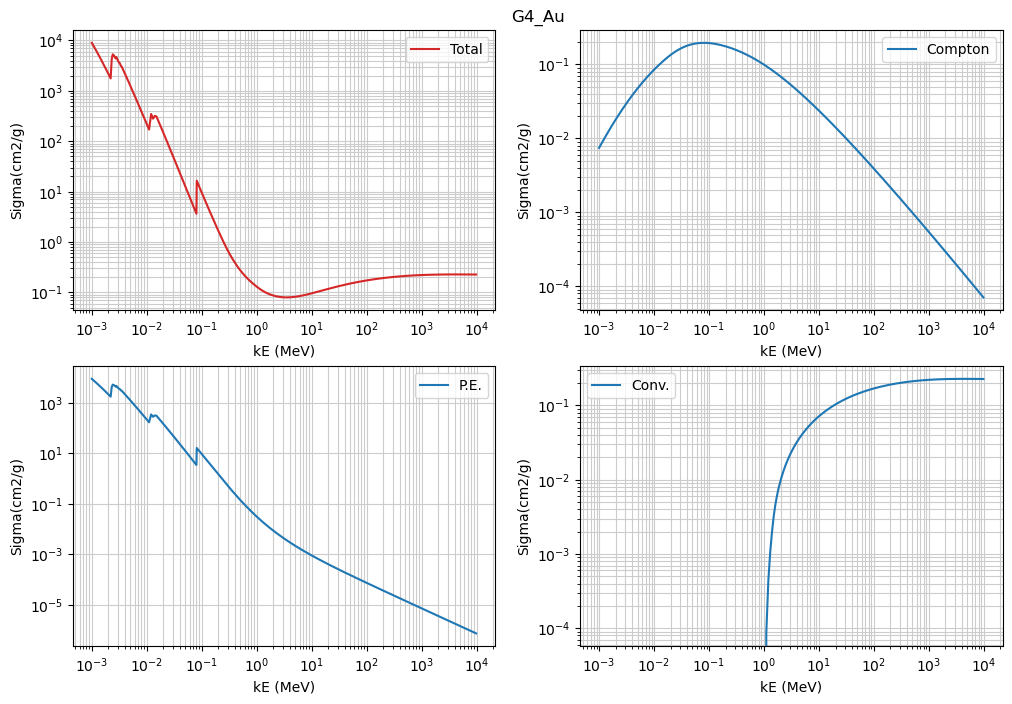

In [55]:
plot_photon_xsec(xsection_list, title_=material_name)

----
### Electron Processes

In [10]:
help(emcalculator.CalculateDEDX)

Help on function CalculateDEDX in module geant4.utils.emcalculator:

CalculateDEDX(particle_name=None, material_name=None, Elist=None, verbose=0)
    Calculate stopping powers for a give particle, material and
    a list of energy, returing stopping power for the components of
    "Ionization", "Radiation" and total one.
    
    Arguments:
      particle_name:   particle name
      materia_name:    material name
      Elist:           list of energy
      verbose:         verbose level [0]
    
    Keys of index:
      "ioni":   ionization
      "brems":  Bremsstrahlung
      "tot":    total
    
    Example:
      dedx_list = CalculateDEDX(...)
      value = dedx_list[energy_index]["ioni"]



In [66]:
# Setup
material_name = "G4_WATER"
box.material = gNistManager.FindOrBuildMaterial(material_name)
gRunManager.GeometryHasBeenModified()
gRunManager.BeamOn(0)

# energy
elist= []
for n in range(-3, 3) :
  for i in range(10,99) :
    elist.append(i/10.*10.**n *MeV)

# calculate stopping power
pname = "e-"
dedx_list_e = emcalculator.CalculateDEDX(pname, material_name, Elist=elist, verbose=0)
#
pname = "proton"
dedx_list_p = emcalculator.CalculateDEDX(pname, material_name, Elist=elist, verbose=0)


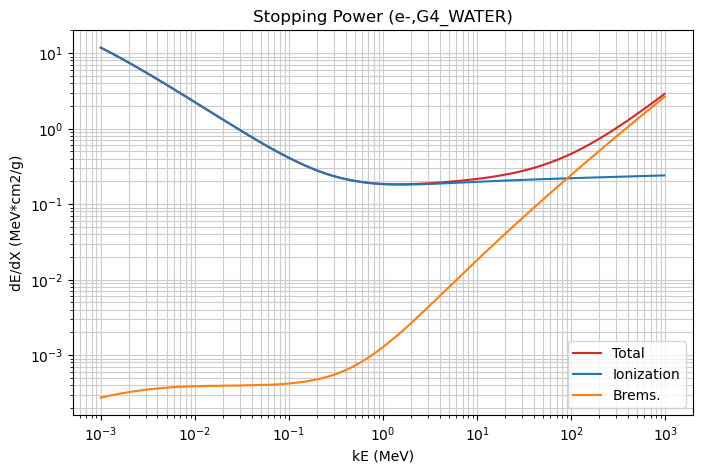

In [68]:
title = "e-," + material_name
plot_dedx(dedx_list_e, title_=title)

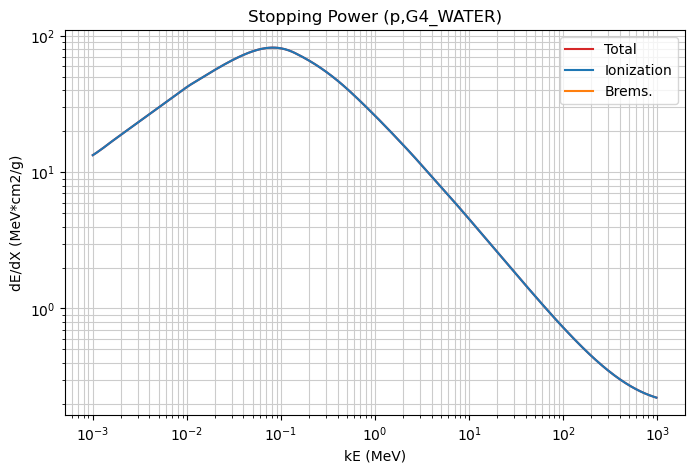

In [69]:
title = "p," + material_name
plot_dedx(dedx_list_p, title_=title)